# Bonus Questions

<div class="alert alert-warning">
<h3>Objective:</h3>

The following tasks are aimed to help you gain deeper insight when implementing an A/B test. The insight gained from this exercise will help you understand the role of sample size in the result of an A/B test.
 
</div>

Consider a scenario where you have two variants A and B with the following specifications:

- Use the conversion rates from the synthetic data from the previous sessions
- Take a $\beta(100,100)$ as the prior for both variants


<div class="alert alert-info">
<h4>Task 1</h4>

Your task is to investigate how increasing the sample size affects the results of the A/B test. In particular, you need to investigate the following:

1. Vary the sample size and investigate how the uplift changes. 
2. Repeat this for a strong prior e.g. $\beta(1000,1000)$ instead of $\beta(100,100)$

</div>

<div class="alert alert-success">

Hints: 

- Create a for-loop and vary the sample size according to this list: [20, 50, 100, 200, 500, 1000] 
- For simplicity, you can assume that the sample size is the same for both variants.
- Let that conversion rates remain constant while varying the sample size.
- Plot the uplift distribution vs the sample size and discuss your findings.
- Repeat the above steps for a strong prior e.g. $\beta(1000,1000)$ instead of $\beta(100,100)$

Solution:

In [ ]:
trace_weak_all = sample_size_effect(sample_sizes   = [20, 50, 100, 200, 500, 1000], 
                                    prior          = [100, 100], 
                                    successes_rate = [0.2, 0.25])

trace_strong_all = sample_size_effect(sample_sizes   = [20, 50, 100, 200, 500, 1000], 
                                      prior          = [1000, 1000], 
                                      successes_rate = [0.2, 0.25])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 26 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS

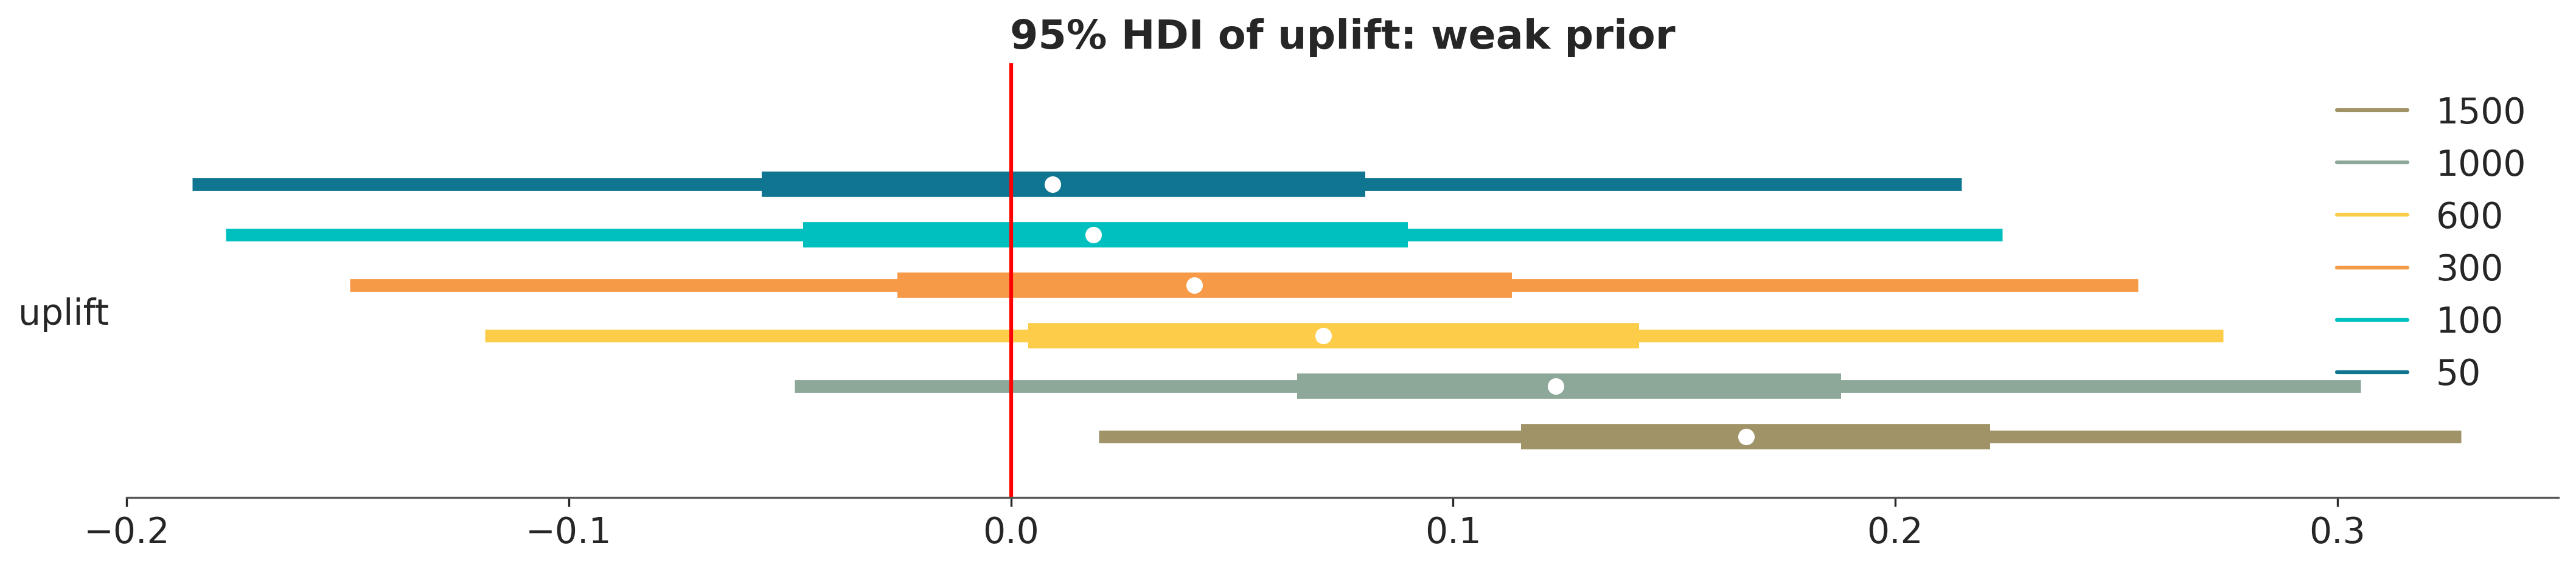

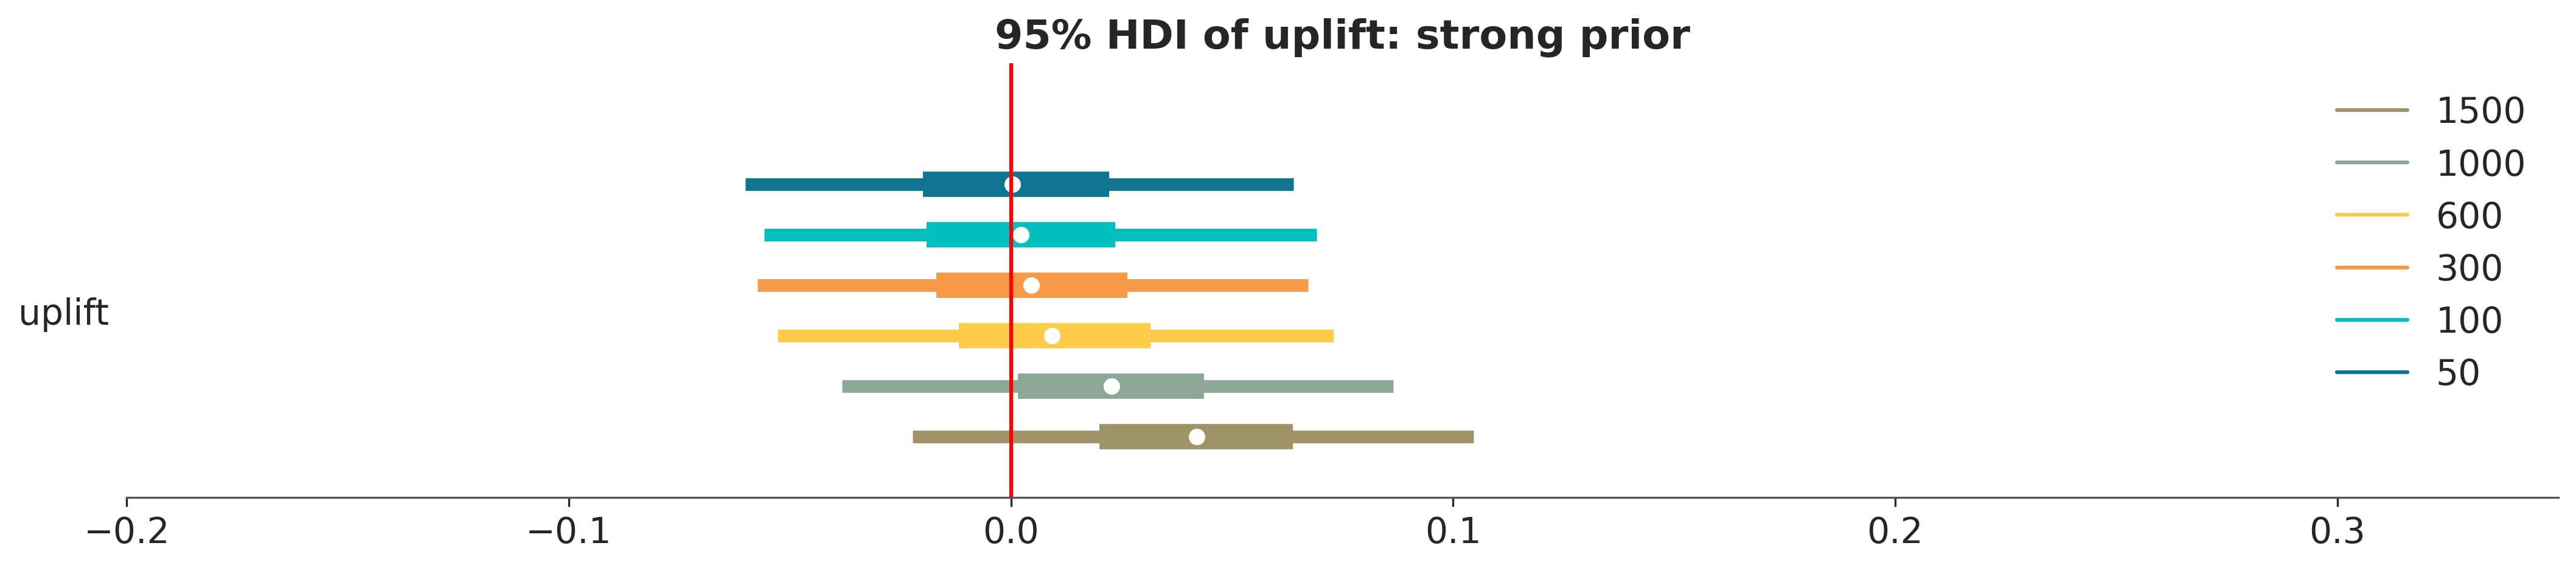

In [ ]:
sample_sizes   = [20, 50, 100, 200, 500, 1000]

ax=az.plot_forest(
                [trace_weak_all[i] for i in sample_sizes],
                model_names=['50', '100', '300', '600', '1000', '1500'],
                var_names=["uplift"],
                combined=True,
                hdi_prob=0.95,
                figsize=(14, 3),
                markersize=10,
                linewidth=5,
                   )
plt.axvline(x=0, color="red");
ax[0].set_title("95% HDI of uplift: weak prior")
ax[0].set_xlim(-0.2,0.35)

ax=az.plot_forest(
                [trace_strong_all[i] for i in sample_sizes],
                model_names=['50', '100', '300', '600', '1000', '1500'],
                var_names=["uplift"],
                combined=True,
                hdi_prob=0.95,
                figsize=(14, 3),
                markersize=10,
                linewidth=5,
                   )
plt.axvline(x=0, color="red");
ax[0].set_title("95% HDI of uplift: strong prior")
ax[0].set_xlim(-0.2,0.35)

plt.tight_layout()
plt.show()

Answer:

- The HDI for the uplift of weak prior jumps up very quickly by increasing the number of trials. This is because the posterior is mostly driven by the data than the prior. However, the HDI for the uplift of strong prior is only gradually increasing by the number of trials.

- Data has strong evidence for the uplift being positive (0.3 success rate of B vs 0.2 success rate of A). However, the strong prior makes the effect of data less significant. That's why the HDI for the uplift of strong prior includes zero until the number of trials is large enough.

- On the other hand, the HDI for the uplift of weak prior barely includes zero. This is because the posterior is mostly driven by the data than the prior.

- The uplift distribution of weak prior is more spread out than the strong prior. This is because the weak prior is less informative (high uncertainty) than the strong prior.

observations:

- the uplift distribution of weak prior is more spread out than the strong prior. This is because the weak prior is less informative (high uncertainty) than the strong prior.
- however, when sample size increase, the uplift distribution of weak prior becomes narrower.

- the uplift distribution of the strong prior is more concentrated around zero than the weak prior. This is because the strong prior is more informative (low uncertainty) than the weak prior.

- the HDI for the uplift of weak prior includes zero for sample size up to 300. Since then the HDI indicates that B is better than A.
- however, the HDI for the uplift of strong prior includes zero for sample size up to almost 1000. So the impact of the data is less significant than the weak prior.